In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath('../..'))

In [2]:
import utils 
import dataset
import numpy as np
import torch
import matplotlib.pyplot as plt
from dataset import DataSet
import os
import utils
%load_ext autoreload
np.random.seed(2) 
torch.manual_seed(2)

ModuleNotFoundError: No module named 'utils'

In [3]:
! pwd

/Users/mattlowery/Desktop/Desko/code/astro/hetast/src/notebooks


# g band attn scores vis

#### steps:

 
##### 1) uncomment lines 90-93 in src/layers.py to have the attention scores saved to a file notebooks/p_attn when utils.evaluate_hetvae is called below

##### 2) hit autoreload to reimport layers.py

In [240]:
%autoreload

In [241]:
lcs = utils.get_data('../../datasets/ZTF_g', sep=',', start_col=1, batch_size=1, min_length=1, n_union_tp=3500, num_resamples=0,shuffle=True)
net, optimizer, args, epoch, loss, train_loss, test_loss = utils.load_checkpoint('../checkpoints/final/ZTF_g0.668415367603302.h5', lcs.data_obj)

Exception: ../../datasets/ZTF_g is not a directory

In [232]:
obj_name ='080306.81+195953.1' # take the same object
lc = lcs.dataset[lcs.valid_files_df.index.get_loc(obj_name)]
x = torch.utils.data.DataLoader(lc[np.newaxis], batch_size=1)

In [233]:
# calling eval to save the attn scores
avg_nll, avg_mse, nlls = utils.evaluate_hetvae(net,lcs.data_obj['input_dim'],x,frac=1,k_iwae=1,device='mps')  # ignore loss bc we're not subsampling

  0%|                                                                                                                                                                       | 0/1 [00:00<?, ?it/s]

torch.Size([1, 16, 16, 1974, 1])
saved_attention scores to local file p_attn
torch.Size([1, 16, 1974, 16, 128])


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.39it/s]

nll: nan, mse: nan, mae: nan, mean_mse: nan, mean_mae: nan


In [234]:
# raw shape: torch.Size([1, 16, 16, 2872, 3]): (batch_size x heads x ref pts x num pts in lc x num bands) 
p_attn = torch.load('p_attn').cpu().squeeze(0)
print(p_attn.shape) # dims are: num heads x num ref points x length of formatted light curve

torch.Size([16, 16, 1974, 1])


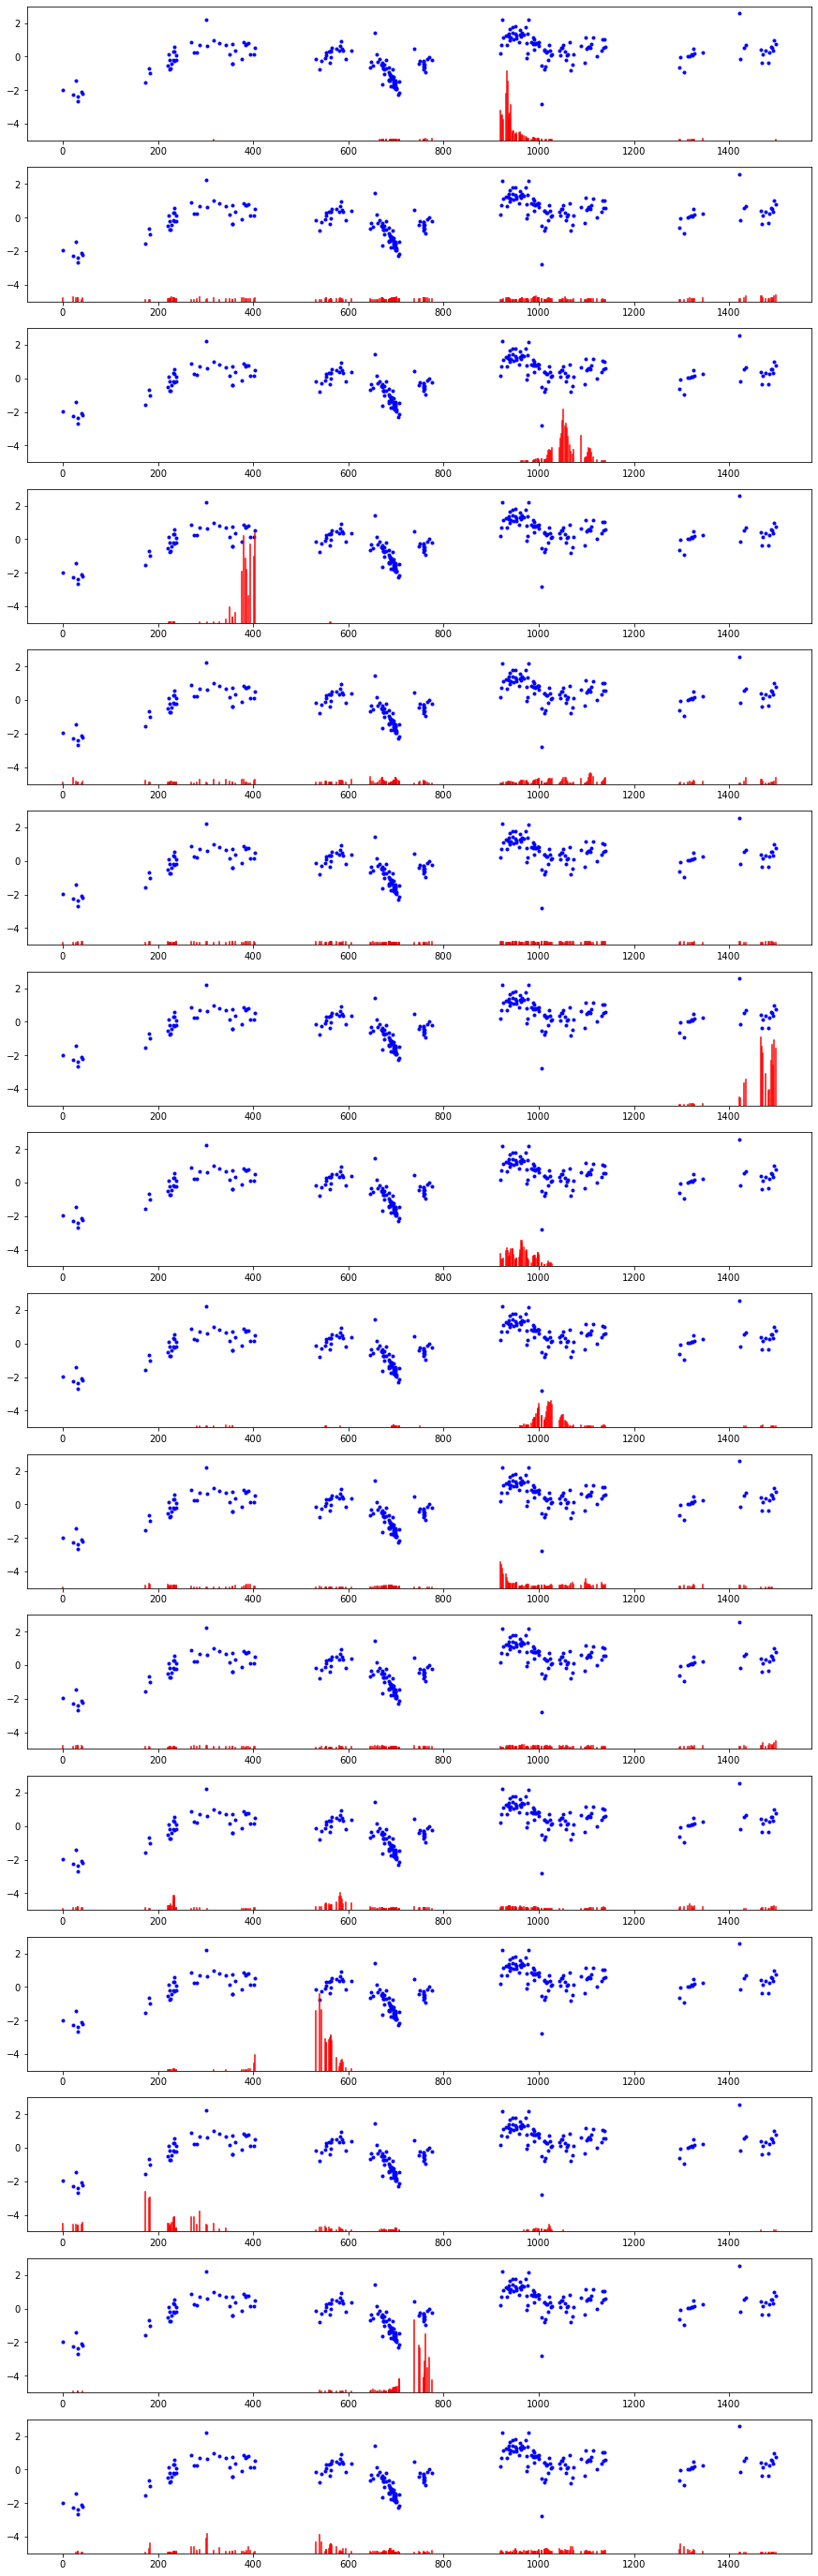

In [236]:
# visualize attention scores for 1 reference pt for all heads
n_bands = lc.shape[0]
n_heads = 16
fig, ax = plt.subplots(n_heads,n_bands, figsize=(15,50), squeeze=False)

for i in range(n_heads):
    for band in range(n_bands):
        pts = lc[band,:,1].nonzero()[0]
        t = lc[band,pts,0]
        y = lc[band,pts,1]
        ax[i][band].scatter(t,y, c='blue', marker='.')
        ax[i][band].set_ylim(-5,3)
        attn = p_attn[i,0,pts,band] # index of the head, first ref point, at all the valid points 
        for pi in attn.nonzero():
            # plot straight line relative to attention score (scaled for vis)  
            # the reference point has with the observation
            ax[i][0].plot([t[pi], t[pi]], [-5, -5+(attn[pi]*35)], c='r')
plt.savefig('img/attn_vis_g')

In [ ]:
## multivariate.... then add to thesis and sleep........

# gri band attn scores vis

In [208]:
lcs = utils.get_data('../datasets/ZTF_all', sep=',', start_col=1, batch_size=1, min_length=1, n_union_tp=3500, num_resamples=0,shuffle=True)
net, optimizer, args, epoch, loss, train_loss, test_loss = utils.load_checkpoint('./checkpoints/ZTF_all_noz0.7984392046928406.h5', lcs.data_obj)

validated 3407 files out of 3407 for band='r'
validated 3407 files out of 3407 for band='i'
validated 3408 files out of 3408 for band='g'
created union_tp attribute of length 3500
dataset created w/ shape (2683, 3, 4431, 3)
train size: 2414, valid size: 242, test size: 269
=> loading checkpoint './checkpoints/ZTF_all_noz0.7984392046928406.h5'
Namespace(n_union_tp=3500, data_folder='datasets/ZTF_all_noz', checkpoint='ZTF_all_noz0.7986480593681335.h5', start_col=1, inc_errors=False, print_at=1, embed_time=128, enc_num_heads=16, latent_dim=64, mixing='concat', num_ref_points=16, rec_hidden=128, width=512, save_at=30, patience=100, early_stopping=False, niters=20000, frac=0.5, batch_size=2, mse_weight=5.0, dropout=0.0, num_resamples=0, lr=1e-08, scheduler=False, warmup=4000, kl_zero=False, kl_annealing=True, net='hetvae', device='mps', const_var=False, var_per_dim=False, std=0.1, seed=2, save=True, k_iwae=1)


In [213]:
obj_name ='080306.81+195953.1' # take the same object
lc = lcs.dataset[lcs.valid_files_df.index.get_loc(obj_name)]
x = torch.utils.data.DataLoader(lc[np.newaxis], batch_size=1)

In [214]:
# calling eval to save the attn scores
avg_nll, avg_mse, nlls = utils.evaluate_hetvae(net,lcs.data_obj['input_dim'],x,frac=1,k_iwae=1,device='mps')  # ignore loss bc we're not subsampling

  0%|                                                                                                                                                                       | 0/1 [00:00<?, ?it/s]

torch.Size([1, 16, 16, 4431, 3])
saved_attention scores to local file p_attn
torch.Size([1, 16, 4431, 16, 128])


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.03s/it]

nll: nan, mse: nan, mae: nan, mean_mse: nan, mean_mae: nan


In [215]:
# raw shape: torch.Size([1, 16, 16, 2872, 3]): (batch_size x heads x ref pts x num pts in lc x num bands) 
p_attn = torch.load('p_attn').cpu().squeeze(0)
print(p_attn.shape) # dims are: num heads x num ref points x length of formatted light curve

torch.Size([16, 16, 4431, 3])


In [219]:
lc.shape

(3, 4431, 3)

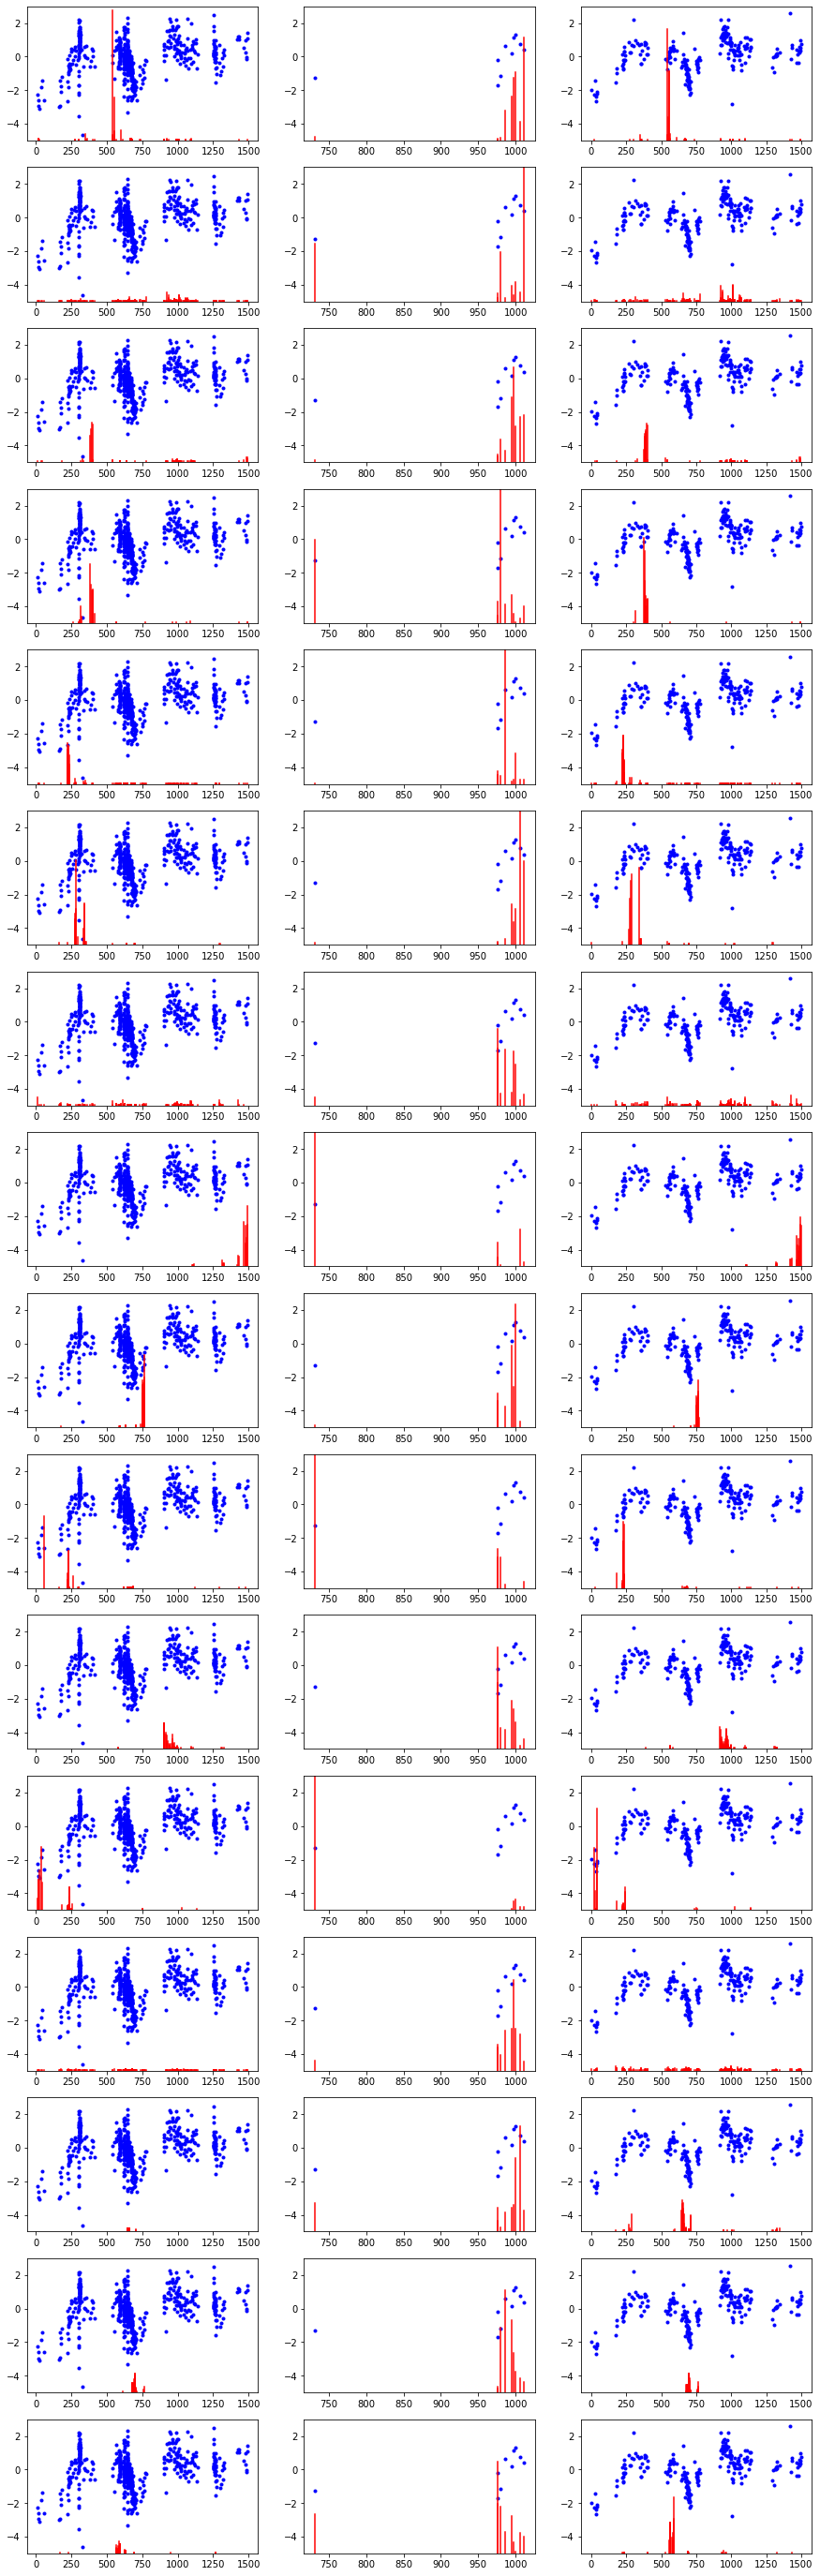

In [227]:
# visualize attention scores for 1 reference pt for all heads
n_bands = lc.shape[0]
n_heads = 16
fig, ax = plt.subplots(n_heads,n_bands, figsize=(15,50), squeeze=False)

for i in range(n_heads):
    for band in range(n_bands):
        #print(lc[band,:,1].shape)
        pts = lc[band,:,1].nonzero()[0]
        t = lc[band,pts,0]
        y = lc[band,pts,1]
        ax[i][band].scatter(t,y, c='blue', marker='.')
        ax[i][band].set_ylim(-5,3)
        attn = p_attn[i,0,pts,band] # index of the head, first ref point, at all the valid points 
        #print(attn.nonzero().shape)
        for pi in attn.nonzero():
            # plot straight line relative to attention score (scaled for vis)  
            # the reference point has with the observation
            ax[i][band].plot([t[pi], t[pi]], [-5, -5+(attn[pi]*20)], c='r')
            
plt.savefig('img/attn_vis_gri')

In [228]:
p_attn.shape # should be 1 for each band, for each ref pt
p_attn[0,0,:,0].sum()

torch.Size([16, 16, 4431, 3])